In [96]:
import sys
sys.path.append('C:/Users/jangj/anaconda3/envs/tf/Lib/site-packages')

In [97]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
fire_images_path = r"fire_dataset/fire_images"
non_fire_images_path = r"fire_dataset/non_fire_images"

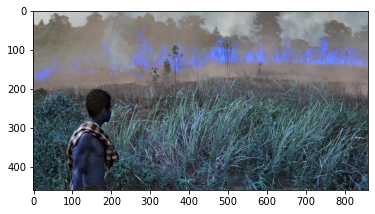

In [99]:
for img in os.listdir(fire_images_path):
    img_array = cv2.imread(os.path.join(fire_images_path,img))
    plt.imshow(img_array)
    plt.show()
    break

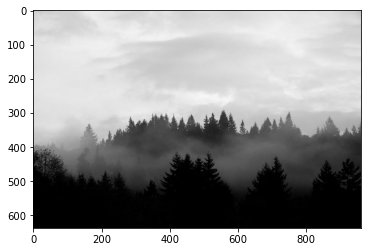

In [100]:
for img in os.listdir(non_fire_images_path):
    img_array = cv2.imread(os.path.join(non_fire_images_path,img))
    plt.imshow(img_array)
    plt.show()
    break

In [101]:
img_array.shape

(638, 960, 3)

In [102]:
data = []
IMG_SIZE = 300

def get_data(file_path,class_num, data):
    for img in os.listdir(file_path):
        try:
            img_array = cv2.imread(os.path.join(file_path,img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([new_array, class_num])
        except:
            pass
get_data(fire_images_path,1,data)
get_data(non_fire_images_path,0,data)

In [103]:
len(data)

998

In [104]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense, Activation, Flatten, Dropout

In [105]:
data_augmentation1 = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomZoom(0.5),
])

data_augmentation2 = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomContrast(0.2)
])

def apply_augmentation(data):
    for i in range(len(data)):
        if data[i][1] == 0:
            data.append([data_augmentation1(data[i][0]),0])
            data.append([data_augmentation2(data[i][0]),0])
apply_augmentation(data)
len(data)

1484

In [106]:
import random
random.shuffle(data)

In [107]:
X = []
y = []

for i in data:
    X.append(i[0])
    y.append(i[1])

In [108]:
X[0],y[0]

(array([[[151, 157, 162],
         [147, 154, 158],
         [146, 152, 157],
         ...,
         [ 64,  59,  58],
         [ 64,  59,  58],
         [ 63,  58,  57]],
 
        [[151, 157, 162],
         [148, 153, 158],
         [147, 153, 158],
         ...,
         [ 66,  61,  60],
         [ 64,  59,  58],
         [ 63,  58,  57]],
 
        [[151, 157, 162],
         [147, 154, 159],
         [147, 153, 158],
         ...,
         [ 67,  62,  61],
         [ 65,  60,  59],
         [ 64,  59,  58]],
 
        ...,
 
        [[ 60,  88, 112],
         [ 57,  87, 107],
         [ 55,  85, 102],
         ...,
         [107, 152, 176],
         [100, 147, 171],
         [111, 159, 183]],
 
        [[ 62,  90, 114],
         [ 58,  88, 108],
         [ 59,  89, 106],
         ...,
         [110, 160, 186],
         [109, 159, 185],
         [116, 166, 192]],
 
        [[ 75, 103, 127],
         [ 67,  97, 117],
         [ 66,  96, 113],
         ...,
         [116, 167, 193],
  

(array([729.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 755.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

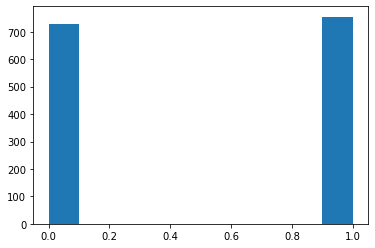

In [109]:
plt.hist(y)

In [110]:
X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE,3)
y = np.array(y)

In [111]:
X.shape, y.shape

((1484, 300, 300, 3), (1484,))

In [112]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5)

In [113]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(1187, 300, 300, 3)
(148, 300, 300, 3)
(149, 300, 300, 3)


In [114]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense, Activation, Flatten, Dropout

In [115]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

Physical devices cannot be modified after being initialized


In [116]:
model = models.Sequential([
    
  layers.Conv2D(32, kernel_size = (3,3), padding='same', activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),

    
  layers.Flatten(),
  layers.Dense(60, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [117]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 150, 150, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 37, 37, 64)     

In [118]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [119]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-fire-model.h5',save_best_only=True)

In [120]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [121]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30)

Epoch 1/30
38/38 [==============================] - 2s 44ms/step - loss: 3.8162 - accuracy: 0.6495 - val_loss: 0.3395 - val_accuracy: 0.8658
Epoch 2/30
38/38 [==============================] - 2s 40ms/step - loss: 0.2587 - accuracy: 0.9065 - val_loss: 0.1836 - val_accuracy: 0.9396
Epoch 3/30
38/38 [==============================] - 1s 39ms/step - loss: 0.1821 - accuracy: 0.9233 - val_loss: 0.1344 - val_accuracy: 0.9396
Epoch 4/30
38/38 [==============================] - 1s 37ms/step - loss: 0.2632 - accuracy: 0.8964 - val_loss: 0.1470 - val_accuracy: 0.9597
Epoch 5/30
38/38 [==============================] - 1s 38ms/step - loss: 0.1460 - accuracy: 0.9469 - val_loss: 0.1804 - val_accuracy: 0.9128
Epoch 6/30
38/38 [==============================] - 1s 37ms/step - loss: 0.1232 - accuracy: 0.9511 - val_loss: 0.1018 - val_accuracy: 0.9732
Epoch 7/30
38/38 [==============================] - 1s 37ms/step - loss: 0.1395 - accuracy: 0.9503 - val_loss: 0.1147 - val_accuracy: 0.9463
Epoch 8/30
38

In [122]:
model.save_weights('model-fire2-weights.h5')

In [123]:
model.save('model-fire2-whole.h5')

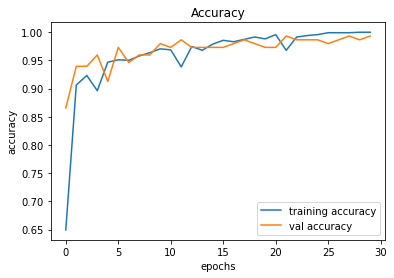

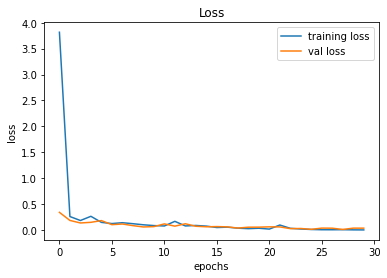

In [124]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [125]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 10ms/step - loss: 0.2529 - accuracy: 0.9797


[0.25290465354919434, 0.9797297120094299]

In [126]:
predictions = model.predict(X_test)

In [127]:
predictions[:5]

array([[1.0000000e+00],
       [1.3848669e-04],
       [1.0000000e+00],
       [3.1736249e-08],
       [9.9999595e-01]], dtype=float32)

In [128]:
predicted= []

for i in predictions:
    if i >0.5:
        predicted.append(1)
    else:
        predicted.append(0)
predicted[:5]

[1, 0, 1, 0, 1]

In [129]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted)

<AxesSubplot:>

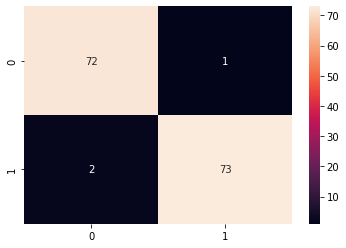

In [130]:
import seaborn as sn

sn.heatmap(cm,annot=True, fmt='d')

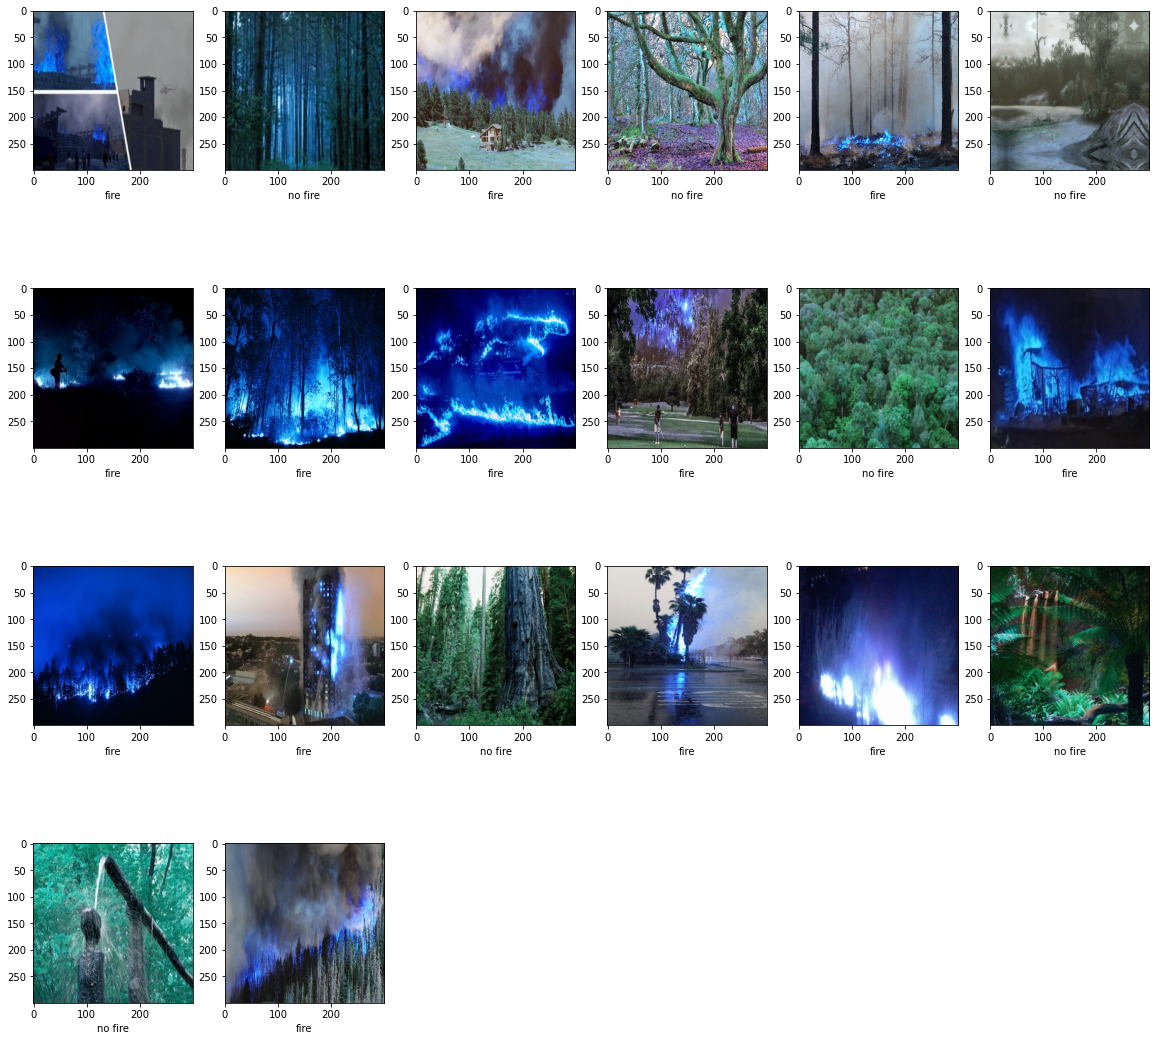

In [131]:
plt.figure(figsize=(20,40))

cat = ["no fire", "fire"]

for i in range(20):
    plt.subplot(8,6,i+1)
    plt.imshow(X_test[i])
    plt.xlabel(cat[predicted[i]])